# Week 7 - 22/11/17


**Main objectives:**

- Try optimising $m_b$ for a better fit.
- Chi-squared
- Think a bit more about what happens in radiation model for n-n
- Justification of approximation in gravity model

**Completed objectives:**

- Plot the theory-simulation ratio rather than the just them on top of eachother.
- Plot radiation model analytical form vs. analytical form.
- Average the epsChangeY/X with multiple distributions to see if the results match with the analytical form better (with error bars?).
- Average the radiation plots
- Error bars on the averaged runs?


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hm.analysis.explicit_tripoint import epsChangeYRatio_g, epsChangeXRatio_g

## Plotting ratio $\frac{\epsilon_{sim}}{\epsilon_{ana}}$ for gravity model

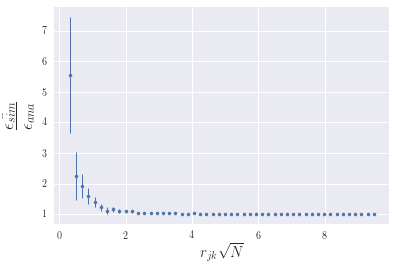

In [65]:
epsChangeYRatio_g(0.01,0.3, 0.4, 50, 1000, runs=10, gamma=2, exp=True, ib=True)

This makes sense - for some reason the simulated version seems to tend to some constant value for small $r_{jk}$, not sure why this is (intraflow?). The analytical form instead tends to zero as one might expect, therefore the ratio blows up.

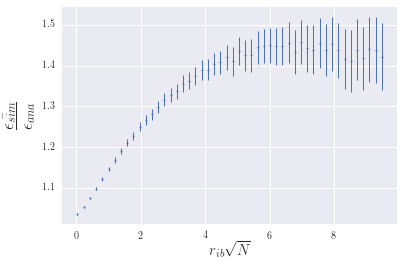

In [30]:
epsChangeXRatio_g(0.001,0.3, 0.03, 50, 1000, runs=50, gamma=2, exp=True, ib=True)

Not sure what to make of this plot.

## Analytical form of $\epsilon$ for radiation model

We found the form as:

$$\epsilon = 1 - \frac{r_{ib}^2}{r_{ib}^2+\frac{r_{jk}}{2}^2} \frac{\pi \rho r_{ib}^2 + 2}{\pi \rho (r_{ib}^2+\frac{r_{jk}}{2}^2) + 1}$$

or

$$\epsilon = 1 - \frac{r_{ib}^2}{r_{ij}^2} \frac{\pi \rho r_{ib}^2 + 2}{\pi \rho r_{ij}^2 + 1}$$

assuming $m_b = m_j + m_k$.

In [4]:
from hm.analysis.explicit_tripoint import epsChangeYRatio_r, epsChangeXRatio_r, epsChangeY_r, epsChangeX_r

Trying these with a higher density of points to even out the inhomogeneities. But these are always going to be on the same scale if we're talking about the typical separation. So the analytical result will always be poor for small $r_{jk}\sqrt{N}$.

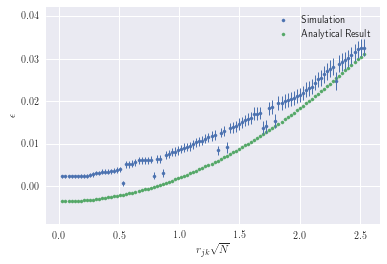

In [18]:
epsChangeY_r(0.001,0.08, 0.3, 100, 1000, runs=50, ib=True, analytical=True)

There's *always* a point of low error at $r_{jk} \sqrt{N} \approx 0.9$, why is this? Are they becoming nearest neighbours?

Why is the analytical result so poor for small $r_{jk}$? Don't really understand this. (See Week 8 for the answer to this mysterious riddle)

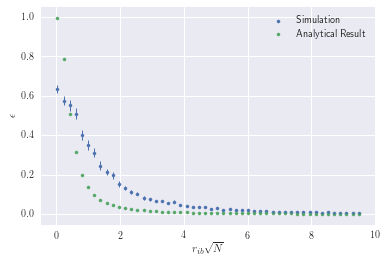

In [28]:
epsChangeX_r(0.001,0.3, 0.03, 50, 1000, runs=50, ib=True, analytical=True)

This analytical result seems *ok* in $r_{ib}$. How come the simulation plateaus for small $r_{ib}$ though? Some simple working shows that when $i$ and $b$ (or $j$ and $k$ combined) become nearest neighbours, then $\epsilon_{\text{sim}}$ should reach a constant value of $-\frac{1}{2}$.

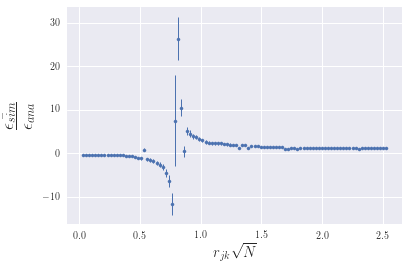

In [20]:
epsChangeYRatio_r(0.001,0.08, 0.3, 100, 1000, runs=50, ib=True)

A singularity when the analytical result drops to zero, is there any way around this? Do we care? A ratio probably isn't a good measure of the fit in this case 

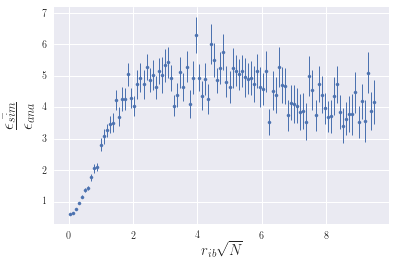

In [29]:
epsChangeXRatio_r(0.001,0.3, 0.03, 100, 1000, runs=50, ib=True)

## Looking further into the small $\epsilon_{\text{sim}}$ trough at $r_{jk} \approx 0.9 \sqrt(N)$ in radiation model

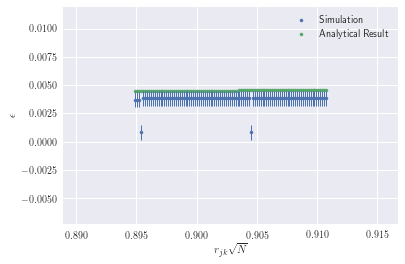

In [33]:
epsChangeY_r(0.0283,0.0288, 0.4, 100, 1000, runs=50, ib=True, analytical=True)

Could still zoom-in further on this interval.

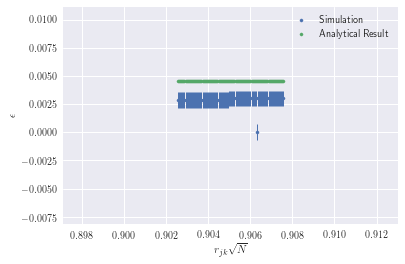

In [35]:
epsChangeY_r(0.02854206,0.0287002, 0.4, 100, 1000, runs=50, ib=True, analytical=True)

Doesn't seem to be increasing in resolution at all, perhaps just a computational quirk where the simulation is more unstable at these values of $r_{jk}$?

## Optimising $m_b$ for gravity model fitting

Idea is to minimise the $\chi^2$ fit between the simulated and analytical results by varying the value of $m_b$ in the analytical form of the gravity model.

$$\epsilon(r_{ib}, r_{jk})_{e} = 1 - \frac{e^{-\gamma r_{ij}} + e^{-\gamma r_{ik}}}{m_b e^{- \gamma r_{ib}}}$$

is our new form of for $\epsilon$, where we have set $m_j = m_k = 1$, as in our simulation. Then we'll minimise $\chi^2$ between the simulated form. 

Think we will try to optimise on the 2D grid with $x$-$y$ dimensions as $r_{ib}$ and $r_{jk}$, does this make sense?
